# Thermo-poro-elasticity problems

We design a discontinuos Galerkin method for solving the linear **thermo-poro-elasticity** problem described by the following set of the equations:

$$
    \begin{aligned}
-\boldsymbol\nabla\cdot(2\mu\boldsymbol\nabla_s\boldsymbol{u} + (\lambda\boldsymbol\nabla\cdot\boldsymbol{u}-\alpha p -\beta T)\mathbb{I}_d) &= \boldsymbol{f}, \quad\text{in}\; \Omega, \\
\partial_t(a_0 T - b_0 p + \beta\boldsymbol\nabla\cdot\boldsymbol{u}) -\boldsymbol\nabla\cdot(\Theta\boldsymbol\nabla T) &= h, \quad\text{in}\; \Omega, \\
\partial_t(c_0 p - b_0 T + \alpha\boldsymbol\nabla\cdot\boldsymbol{u}) -\boldsymbol\nabla\cdot(\kappa\boldsymbol\nabla p) &= g, \quad\text{in}\; \Omega.
    \end{aligned}
$$


We present a **four-field formulation** that facilitates the derivation of locking-free discretizations. It is obtained by introducing the additional variable 

$$
\varphi = \lambda \boldsymbol\nabla\cdot\boldsymbol{u} - \alpha p -\beta T.
$$

### Semi-discrete weak formulation

By testing with sufficiently regular functions, integrating by parts, and assuming for simplicity homogeneous Dirichlet boundary conditions for all primary variables, we get the following weak form of the problem:

$$
    \begin{aligned}
(2\mu\boldsymbol\nabla_s\boldsymbol{u}, \boldsymbol\nabla_s\boldsymbol{v})_\Omega  + (\varphi,\boldsymbol\nabla\cdot\boldsymbol{v})_\Omega &= (\boldsymbol{f}, \boldsymbol{v})_\Omega, \\
(\lambda^{-1}(\varphi+\alpha p+\beta T),\psi)_\Omega - (\psi,\boldsymbol\nabla\cdot\boldsymbol{u})_\Omega &= 0, \\
((a_0+\beta^2 \lambda^{-1}) \partial_t T, S)_\Omega 
+ (\beta\lambda^{-1}\partial_t \varphi, S)_\Omega 
+((\alpha\beta\lambda^{-1} - b_0) \partial_t p, S)_\Omega +(\Theta\boldsymbol\nabla T, \boldsymbol\nabla S)_\Omega &= (h, S)_\Omega,  \\
((c_0+\alpha^2 \lambda^{-1}) \partial_t p, q)_\Omega 
+ (\alpha\lambda^{-1}\partial_t \varphi, q)_\Omega 
+((\alpha\beta\lambda^{-1} - b_0) \partial_t T, q)_\Omega +(\kappa\boldsymbol\nabla p, \boldsymbol\nabla q)_\Omega &= (g, S)_\Omega.
    \end{aligned}
$$

Deriving the second equation in time, summing the resulting four equations, and rearranging, yields the *semi-discrete total weak formulation*, which is used as a strarting point for the derivation of the dG discretization below. The **semi-discrete weak problem** reads: Find $(\boldsymbol{u}, p, T, \varphi)$ in $\boldsymbol{H}^1_0(\Omega)\times{H}^1_0(\Omega)\times{H}^1_0(\Omega)\times L^2(\Omega)$, such that, for all $(\boldsymbol{v}, q, S, \psi)$ in $\boldsymbol{H}^1_0(\Omega)\times{H}^1_0(\Omega)\times{H}^1_0(\Omega)\times L^2(\Omega)$, 

$$
(2\mu\boldsymbol\nabla_s\boldsymbol{u}, \boldsymbol\nabla_s\boldsymbol{v})_\Omega  
+ (\varphi,\boldsymbol\nabla\cdot\boldsymbol{v})_\Omega 
- (\psi,\boldsymbol\nabla\cdot\boldsymbol{u})_\Omega
+(\Theta\boldsymbol\nabla T, \boldsymbol\nabla S)_\Omega 
+(\kappa\boldsymbol\nabla p, \boldsymbol\nabla q)_\Omega
+(\lambda^{-1}\partial_t (\varphi+\alpha p+\beta T),\psi + \alpha q + \beta S)_\Omega 
+ b_0 (\partial_t(p-T), q-S)_\Omega 
+ ((a_0-b_0) \partial_t T, S)_\Omega 
+ ((c_0-b_0) \partial_t p, q)_\Omega = (\boldsymbol{f}, \boldsymbol{v})_\Omega + (h, S)_\Omega + (g, q)_\Omega.
$$

The **well-posedness** of the previous problem follows by taking $\boldsymbol{v} = \partial_t \boldsymbol{u}$, $S = T$, $p = q$, and $\psi = \varphi$ and observing that all the terms appearing on the left-hand side of the resulting equation are positive. The ellpitic terms provides the control of the $H^1_0$-norms of the primary varibles and the classical inf-sup argument gives the bound of the $L^2$-norm of $\varphi$. The a-priori bound is then obtained via standard arguments. 

In the following FEniCS implementation the **fully-discrete formulation** is obtained by considering a backward Euler time advancing scheme. 

## Convergence test 

On the unit square domain $\Omega = (0,1) \times (0,1)$ and time interval $I = (0, 1)$ 
we consider the initial and boundary value problem (corresponding to the thermoporoelasticity system) assuming as analytical solution:
$$
    \begin{aligned}
      u_1 &= (e^{t} - 1) (\sin(2\pi y) (\cos(2 \pi x) - 1) + \frac1{\mu +\lambda} \sin(\pi x) \sin(\pi y)), \\
      u_2 &= (e^{t} - 1) (\sin(2\pi x) (1 - \cos(2 \pi y)) + \frac1{\mu +\lambda} \sin(\pi x) \sin(\pi y)), \\
      p &= (e^{t} - 1) \sin(\pi x) \sin(\pi y), \\
      T &= (e^{t} - 1) (\cos(2 \pi x) - 1) (\cos(2 \pi y) - 1).
    \end{aligned}
$$

Hence, we have $\boldsymbol{u}_{|\partial\Omega} = \boldsymbol{0}$, $p_{|\partial\Omega} = 0$, $T_{|\partial\Omega} = 0$, $\boldsymbol{u}(0) = \boldsymbol{u}_{0} = \boldsymbol{0}$, $p(0) = p_{0} = 0$, and $T(0) = 0$. The right-hand side terms inferred from the exact solution are
$$
    \begin{aligned}
      f_1 &= \pi(e^t - 1)\left(\alpha\cos(\pi x)\sin(\pi y)-2\beta\sin(2\pi x)(cos(2\pi y)-1)-\pi(\cos(\pi x+\pi y)+4\mu\sin(2\pi y)(1-2\cos(2\pi x))-\frac{2\mu\sin(\pi x)\sin(\pi y)}{\mu +\lambda}\right), \\
      f_2 &= \pi(e^t - 1)\left(\alpha\sin(\pi x)\cos(\pi y)-2\beta\sin(2\pi y)(cos(2\pi x)-1)-\pi(\cos(\pi x+\pi y)+4\mu\sin(2\pi x)(2\cos(2\pi y)-1)-\frac{2\mu\sin(\pi x)\sin(\pi y)}{\mu +\lambda}\right), \\
      g &= (2\kappa\pi^2 (e^{t} - 1) + c_0 e^t) \sin(\pi x) \sin(\pi y) - b_0 e^t (cos(2\pi x)-1)(cos(2\pi y)-1) + \frac{\alpha\pi e^t}{\lambda + \mu} \sin(\pi x + \pi y), \\ 
      h &= (4\Theta\pi^2 (e^{t} - 1) + a_0 e^t) (cos(2\pi x)-1)(cos(2\pi y)-1) + 4\Theta\pi^2 (e^{t} - 1)(cos(2\pi x)cos(2\pi y) -1) - b_0 e^t \sin(\pi x) \sin(\pi y) + \frac{\beta\pi e^t \sin(\pi x + \pi y)}{\lambda + \mu} .
    \end{aligned}
$$

## Import FEniCS

In [ ]:
%%capture
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [ ]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np

## Declare problem data

In [ ]:
# problem data
T = 0.6               # final simulation time
mu = Constant(1.0)    # mu fixed as reference parameter (keep it = 1)
lam = Constant(5.0)   # lam can be arbitrarly large (nearly incompressible case)
a_0 = Constant(0.02)  # a_0 can be equal to 0
b_0 = Constant(0.01)  # b_0 < a_0 and b_0 < c_0 (physical constraints)
c_0 = Constant(0.03)  # c_0 can be equal to 0
kappa = Constant(0.2) # strictly positive
theta = Constant(0.05)# strictly positive
alpha = Constant(1.0) # strictly positive and smaller or equal to 1
beta = Constant(0.8)  # strictly positive and smaller or equal to 1

# volumetric forcing term
f1 = Expression((
    'pi*(exp(time)-1)*(_alpha*cos(pi*x[0])*sin(pi*x[1]) -2*_beta*sin(2*pi*x[0])*(cos(2*pi*x[1])-1) -pi*(cos(pi*x[0]+pi*x[1])+4*sin(2*pi*x[1])*(1-2*cos(2*pi*x[0]))))', 
    'pi*(exp(time)-1)*(_alpha*sin(pi*x[0])*cos(pi*x[1]) -2*_beta*sin(2*pi*x[1])*(cos(2*pi*x[0])-1) -pi*(cos(pi*x[0]+pi*x[1])+4*sin(2*pi*x[0])*(2*cos(2*pi*x[1])-1)))'
              ), degree=3, time=0.0, _alpha=alpha, _beta=beta)
f2 = Expression((
    '(2*_mu/(_mu+_lam))*pi*pi*(exp(time)-1)*(sin(pi*x[0])*sin(pi*x[1]))', 
    '(2*_mu/(_mu+_lam))*pi*pi*(exp(time)-1)*(sin(pi*x[0])*sin(pi*x[1]))'
              ), degree=3, time=0.0, _mu=1.0, _lam=lam)

# fluid source term
g1 = Expression('(_kappa*2*pi*pi*(exp(time)-1)+_c_0*exp(time))*sin(pi*x[0])*sin(pi*x[1])', degree=3, time=0.0, _kappa=kappa, _c_0=c_0) 
g2 = Expression('(_alpha*pi/(_mu+_lam))*exp(time)*sin(pi*x[0]+pi*x[1])-_b_0*exp(time)*(cos(2*pi*x[0])-1)*(cos(2*pi*x[1])-1)', degree=3, time=0.0, _mu=1.0, _lam=lam, _b_0=b_0, _alpha=alpha)

# thermal source term
h1 = Expression('(_theta*4*pi*pi*(exp(time)-1)+_a_0*exp(time))*(cos(2*pi*x[0])-1)*(cos(2*pi*x[1])-1)+_theta*4*pi*pi*(exp(time)-1)*(cos(2*pi*x[0])*cos(2*pi*x[1])-1)', degree=3, time=0.0, _theta=theta, _a_0=a_0) 
h2 = Expression('(_beta*pi/(_mu+_lam))*exp(time)*sin(pi*x[0]+pi*x[1])-_b_0*exp(time)*sin(pi*x[0])*sin(pi*x[1])', degree=3, time=0.0, _mu=1.0, _lam=lam, _b_0=b_0, _beta=beta)

# analytical solutions (primary variables)
u_ex = Expression((
      '(exp(time)-1)*(sin(2*pi*x[1])*(cos(2*pi*x[0])-1) + (1.0/(_mu+_lam))*sin(pi*x[0])*sin(pi*x[1]))', 
      '(exp(time)-1)*(sin(2*pi*x[0])*(1-cos(2*pi*x[1])) + (1.0/(_mu+_lam))*sin(pi*x[0])*sin(pi*x[1]))'
              ), degree=4, time=0.0, _mu=1.0, _lam=lam)
p_ex = Expression('(exp(time)-1)*sin(pi*x[0])*sin(pi*x[1])', degree=4, time=0.0)
T_ex = Expression('(exp(time)-1)*(cos(2*pi*x[0])-1)*(cos(2*pi*x[1])-1)', degree=4, time=0.0)

## Implementation of equal order dG scheme

In [ ]:
def dg_ThePorEl4f(n, deg, dt, T, lam, a_0, b_0, c_0, kappa, theta, alpha, beta, u_ex, p_ex, T_ex, f1, f2, g1, g2, h1, h2):
    # 0. method specific pre-computations
    gamma = 9.1*deg**2
    delta = 3.1/deg

    # 1. mesh generation
    #mesh = UnitSquareMesh(n, n, 'crossed')
    square = Rectangle(Point(0.0, 0.0), Point(1.0, 1.0))
    mesh = generate_mesh(square, n)

    # 2. definition of the lowest-order Taylor-Hood finite element pair
    U = VectorElement('DG', mesh.ufl_cell(), deg)
    Q = FiniteElement('DG', mesh.ufl_cell(), deg)
    P = FiniteElement('DG', mesh.ufl_cell(), deg)
    X = FunctionSpace(mesh, MixedElement([U, Q, P, P]))

    # 3a. assembling: def functions and operators 
    u, phi, p, tt = TrialFunctions(X)
    v, psi, q, rr = TestFunctions(X)
    x_old = Function(X)
    u_old, phi_old, p_old, tt_old = split(x_old)
    
    n = FacetNormal(mesh)
    h = CellDiameter(mesh)
    h_avg = (h('+') + h('-'))/2

    # 3b. assembling : def forms
    a1 = (2.0*inner(sym(grad(u)), sym(grad(v))) + phi*div(v) - div(u)*psi)*dx  \
       - 2.0*inner(dot(avg(sym(grad(u))), n('+')), jump(v))*dS \
       - 2.0*inner(jump(u), dot(avg(sym(grad(v))), n('+')))*dS \
       - 2.0*inner(dot(sym(grad(u)), n), v)*ds \
       - 2.0*inner(u, dot(sym(grad(v)), n))*ds \
       + 2.0*gamma/h_avg*inner(jump(u), jump(v))*dS \
       + 2.0*gamma/h*inner(u, v)*ds \
       + inner(jump(u, n), avg(psi))*dS - inner(jump(v, n), avg(phi))*dS \
       + inner(u, n)*psi*ds - inner(v, n)*phi*ds \
       + delta*h_avg*jump(phi)*jump(psi)*dS 

    a2 = (1.0/lam)*(phi+alpha*p+beta*tt)*(psi+alpha*q+beta*rr)*dx \
       + (b_0*(p-tt)*(q-rr) + (c_0-b_0)*p*q + (a_0-b_0)*tt*rr)*dx

    a3 = dt*kappa*dot(grad(p), grad(q))*dx \
       - dt*kappa*dot(avg(grad(q)), jump(p, n))*dS \
       - dt*kappa*dot(jump(q, n), avg(grad(p)))*dS \
       - dt*kappa*(dot(grad(q), p*n) + dot(q*n, grad(p)))*ds \
       + dt*kappa*gamma/h_avg*dot(jump(p, n), jump(q, n))*dS \
       + dt*kappa*gamma/h*p*q*ds

    a4 = dt*theta*dot(grad(tt), grad(rr))*dx \
       - dt*theta*dot(avg(grad(rr)), jump(tt, n))*dS \
       - dt*theta*dot(jump(rr, n), avg(grad(tt)))*dS \
       - dt*theta*(dot(grad(rr), tt*n) + dot(rr*n, grad(tt)))*ds \
       + dt*theta*gamma/h_avg*dot(jump(tt, n), jump(rr, n))*dS \
       + dt*theta*gamma/h*tt*rr*ds
    
    a = a1 + a2 + a3 + a4   
    
    L = (dot(f1+f2, v) + dt*(g1+g2)*q + dt*(h1+h2)*rr)*dx \
      + (p_old*(c_0*q-b_0*rr) + tt_old*(a_0*rr-b_0*q))*dx \
      + (1/lam)*(alpha*p_old+beta*tt_old+phi_old)*(alpha*q+beta*rr)*dx

    # 4. solve and advance in time 
    A = assemble(a)
    Ainv = LUSolver(A)

    l2err_u = 0.0
    h1err_u = 0.0
    l2err_p = 0.0
    h1err_p = 0.0
    l2err_t = 0.0
    h1err_t = 0.0

    for t in np.arange(dt, T+0.1*dt, dt):
        f1.time = t
        f2.time = t
        g1.time = t
        g2.time = t
        h1.time = t
        h2.time = t
        b = assemble(L)
        
        print('solving time {}'.format(t))
        Ainv.solve(x_old.vector(), b)
        u_old, phi_old, p_old, tt_old = x_old.split()

        u_ex.time = t
        p_ex.time = t
        T_ex.time = t
        l2err_u = max(l2err_u, errornorm(u_ex, u_old, 'L2'))
        h1err_u += dt * (errornorm(u_ex, u_old, 'H10')**2)
        l2err_p = max(l2err_p, errornorm(p_ex, p_old, 'L2'))
        h1err_p += dt * (errornorm(p_ex, p_old, 'H10')**2)
        l2err_t = max(l2err_t, errornorm(T_ex, tt_old, 'L2'))
        h1err_t += dt * (errornorm(T_ex, tt_old, 'H10')**2)
    
    h1err_u = sqrt(h1err_u)
    h1err_p = sqrt(h1err_p)
    h1err_t = sqrt(h1err_t)
    return l2err_u, h1err_u, l2err_p, h1err_p, l2err_t, h1err_t

In [ ]:
M_err=np.zeros((6,4))
deg = 1

for i in range(4):
    n = 5*(2**i)
    dt = 0.3/(4**i)
    l2err_u, h1err_u, l2err_p, h1err_p, l2err_t, h1err_t = dg_ThePorEl4f(n, deg, dt, T, lam, a_0, b_0, c_0, kappa, theta, alpha, beta, u_ex, p_ex, T_ex, f1, f2, g1, g2, h1, h2)

    M_err[0,i] = l2err_u 
    M_err[1,i] = h1err_u
    M_err[2,i] = l2err_p 
    M_err[3,i] = h1err_p
    M_err[4,i] = l2err_t 
    M_err[5,i] = h1err_t

    print('n={} dt={} l2err_u={:.2e} h1err_u={:.2e} l2err_p={:.2e} h1err_p={:.2e} l2err_t={:.2e} h1err_t={:.2e}'.format(n, dt, l2err_u, h1err_u, l2err_p, h1err_p, l2err_t, h1err_t))
    print()

solving time 0.3
solving time 0.6
n=5 dt=0.3 l2err_u=1.11e-01 h1err_u=1.40e+00 l2err_p=1.57e-02 h1err_p=2.07e-01 l2err_t=6.85e-02 h1err_t=1.14e+00

solving time 0.075
solving time 0.15
solving time 0.22499999999999998
solving time 0.3
solving time 0.375
solving time 0.45
solving time 0.5249999999999999
solving time 0.6
n=10 dt=0.075 l2err_u=3.08e-02 h1err_u=5.53e-01 l2err_p=3.86e-03 h1err_p=7.82e-02 l2err_t=1.82e-02 h1err_t=4.40e-01

solving time 0.01875
solving time 0.0375
solving time 0.056249999999999994
solving time 0.075
solving time 0.09375
solving time 0.1125
solving time 0.13124999999999998
solving time 0.15
solving time 0.16874999999999998
solving time 0.18749999999999997
solving time 0.20625
solving time 0.22499999999999998
solving time 0.24374999999999997
solving time 0.2625
solving time 0.28125
solving time 0.3
solving time 0.31875
solving time 0.33749999999999997
solving time 0.35624999999999996
solving time 0.375
solving time 0.39375
solving time 0.4125
solving time 0.431

### Plot convergence results

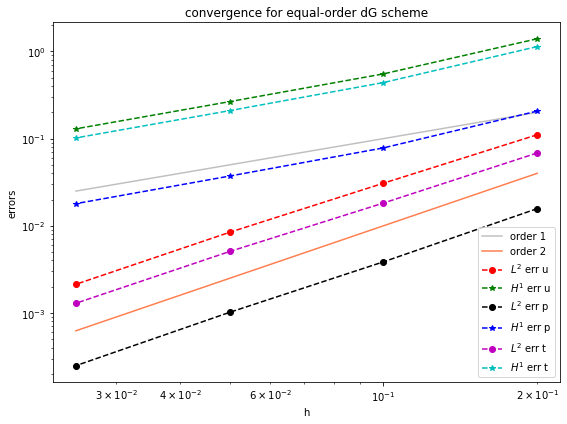

In [ ]:
# definition of the meshsize 
h = np.array([0.2/(2**i) for i in range(4)])

# we use the subplots axis layout managers in matplotlib
fig, axes = plt.subplots(figsize=(8,6))

axes.loglog(h, h, 'silver',label="order 1")
axes.loglog(h, h**2, 'coral',label="order 2")
#axes.loglog(h, h**3, 'm',label="order 3")
axes.loglog(h, M_err[0,:], 'r--o',label="$L^2$ err u")
axes.loglog(h, M_err[1,:], 'g--*',label="$H^1$ err u")
axes.loglog(h, M_err[2,:], 'k--o',label="$L^2$ err p")
axes.loglog(h, M_err[3,:], 'b--*',label="$H^1$ err p")
axes.loglog(h, M_err[4,:], 'm--o',label="$L^2$ err t")
axes.loglog(h, M_err[5,:], 'c--*',label="$H^1$ err t")

axes.set_title("convergence for equal-order dG scheme");
axes.set_xlabel("h")
axes.set_ylabel("errors")
axes.legend(loc=4)

fig.tight_layout()
plt.show()